 <font color=red size=4> 
iFood DA/DArq Case Solution / Éricka Caracas de Castro Santos
 </font>

In [105]:
# Importando bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import nbformat
from nbconvert import PDFExporter
from nbconvert.preprocessors import ExecutePreprocessor


**Visualização e carregamento do dataset.**

In [106]:
# Carregar o dataset de clientes a partir da URL do Github fornecida.
url = 'https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv'
data = pd.read_csv(url)

#Obs: O carregamento de dados também poderia ser realizado a partir da máquina local, com o seguinte código:
#data = pd.read_csv('C:/Users/ericka/Documents/ml_project1_data.csv',sep = ';',encoding='utf-8',na_values=['NA', 'N/A', 'null'])

# Tratamento do tipo do campo "Income" e preenchimento dos valores nulos com um valor padrão.
data['Income'] = data['Income'].fillna(0).astype('int64')


# Verificar as informações sobre o dataset.
print(data.info(verbose=True))
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

<font color=black size=4> 

- **_O dataset possui 2.240 registros distribuídos entre 29 colunas._**
</font>


-------------------------------------------------------------------------------------------------------------------------



<font color=black size=5>**ANÁLISE EXPLORATÓRIA DAS VARIÁVEIS**</font>


In [107]:
# Função para contagem única dos valores da feature.

def calcular_qtde_clientes(data, feature):
    qtde_clientes = data[feature].value_counts()
    return qtde_clientes

In [108]:
# Função para percentual da contagem única dos valores da feature, arredondamento e inclusão do (%).

def calcular_percentual_clientes(data, feature):
    percentual_clientes = (data[feature].value_counts(normalize=True) * 100).round().astype(str) + '%'
    return percentual_clientes

In [109]:
# Função para calcular idade dos clientes a partir do ano de nascimento.

def calcular_idade(ano_nascimento):
    ano_corrente = datetime.now().year
    idade = ano_corrente - ano_nascimento
    return idade

<font color=blue size=4>
Validação da informação sobre a taxa de sucesso da última campanha
</font>

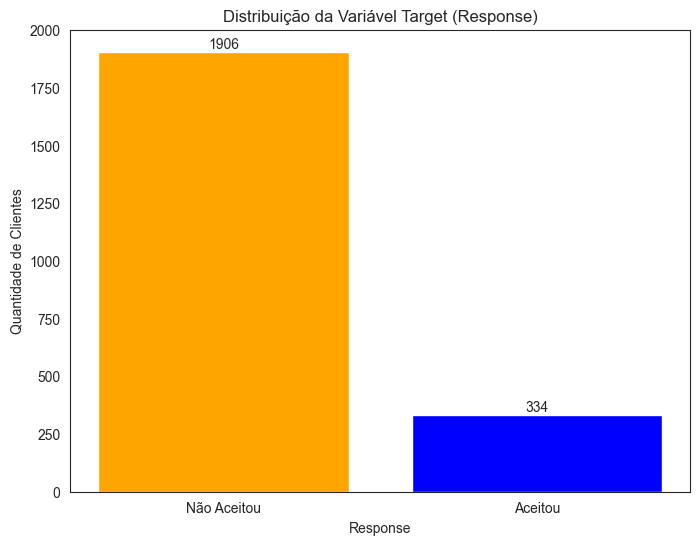

Proporção de clientes que aceitaram a última campanha: 14.91%
Proporção de clientes que não aceitaram a última campanha: 85.09%
Valor de aderência à campanha validado!


In [110]:
# Validar a proporção de clientes que aderiram ou não à última campanha(variável "Response"), na descrição do case foi informada a estimativa de 15%.
qtde_response = calcular_qtde_clientes(data,'Response')

# Configurações dos gráficos.
plt.figure(figsize=(8, 6))
colors = ['orange', 'blue']
x_positions = range(len(qtde_response))

plt.bar(x_positions, qtde_response, color=colors)
plt.title('Distribuição da Variável Target (Response)')
plt.xlabel('Response')
plt.ylabel('Quantidade de Clientes')

# Adicionar legendas com os valores
for i, count in enumerate(qtde_response):
    plt.text(i, count, f'{count}', ha='center', va='bottom')

plt.xticks(x_positions, ['Não Aceitou', 'Aceitou'])

plt.show()


percentages = qtde_response / len(data) * 100
print("Proporção de clientes que aceitaram a última campanha: {:.2f}%".format(percentages[1]))
print("Proporção de clientes que não aceitaram a última campanha: {:.2f}%".format(percentages[0]))

print("Valor de aderência à campanha validado!")

<font color=blue size=4>
Variáveis de aceitação das campanhas 1 a 5 (AcceptedCmp).
</font>

Resultados de aceitação dos clientes na campanha 1:
Não Aceitou: 93.57%
Aceitou: 6.43%

Resultados de aceitação dos clientes na campanha 2:
Não Aceitou: 98.66%
Aceitou: 1.34%

Resultados de aceitação dos clientes na campanha 3:
Não Aceitou: 92.72%
Aceitou: 7.28%

Resultados de aceitação dos clientes na campanha 4:
Não Aceitou: 92.54%
Aceitou: 7.46%

Resultados de aceitação dos clientes na campanha 5:
Não Aceitou: 92.72%
Aceitou: 7.28%



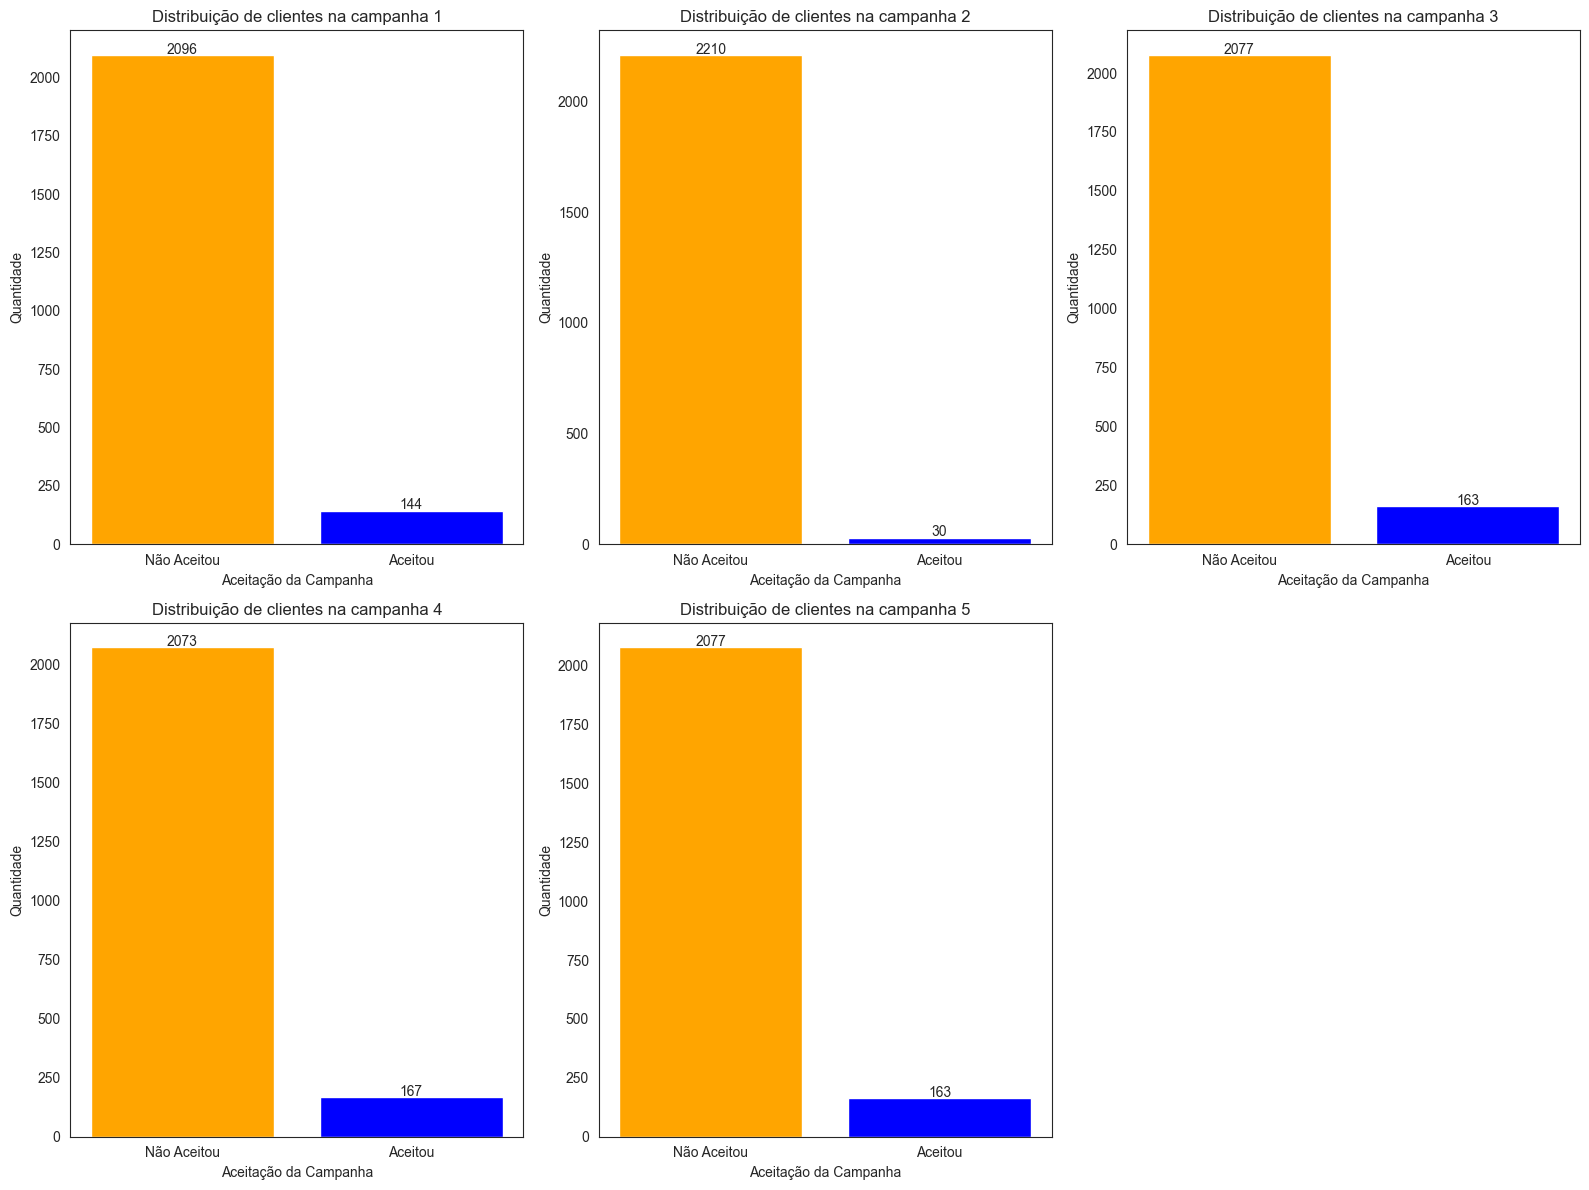

In [111]:
# Variáveis de aceitação das campanhas 1 à 5.
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

label_campaing = {0: 'Não Aceitou', 1: 'Aceitou'}

# Configurações dos gráficos
plt.figure(figsize=(16, 12))
palette = ['orange', 'blue']

for i, col in enumerate(campaign_columns, 1):
    # Otimizar o nome da campanha sem o prefixo "AcceptedCmp"
    campaign_name = col.replace("AcceptedCmp", "")
    
    print(f"Resultados de aceitação dos clientes na campanha {campaign_name}:")
    
    plt.subplot(2, 3, i)
    counts = data[col].map(label_campaing).value_counts()
    plt.bar(counts.index, counts, color=palette)
    plt.title(f'Distribuição de clientes na campanha {campaign_name}')
    plt.xlabel('Aceitação da Campanha')
    plt.ylabel('Quantidade')
    
    for j, count in enumerate(counts):
        plt.text(j, count + 5, f'{count}', ha='center')
    
    total = sum(counts)
    for j, count in enumerate(counts):
        percentage = count / total * 100
        print(f"{label_campaing[j]}: {percentage:.2f}%")
    print()

plt.tight_layout()
plt.show()

<font color=black size=4>

- **_Dentre todas, a campanha 2 obteve a menor aderência com apenas 1,3% de aceitação para o total de 2.240 consumidores._**
- **_Mesmo com os resultados de aderência à última campanha(~15%) sendo o dobro das campanhas anteriores o retorno continua abaixo do esperado, portanto é necessário avaliar as variáveis da base de consumidores e traçar seus perfis para uma taxa de sucesso maior nas próximas campanhas._**

</font>

<font color=blue size=4>

**Variável idade dos clientes (*'Year_Birth'*).**
</font>


In [112]:
# Calculando a idade dos clientes a partir da variável 'Year_Birth'.
data['Idade'] = data['Year_Birth'].apply(calcular_idade)


# Definindo os intervalos, legendas e coluna para faixas etárias.

bins = [0, 20, 36, 51, 67, np.inf]
labels = ['Menor que 20 anos', '20-35 anos', '36-50 anos', '51-66 anos', 'Maior que 66 anos']
data['Faixa_Etaria'] = pd.cut(data['Idade'], bins=bins, labels=labels, right=False)

# Exibir as faixas etárias dos clientes criadas.
print(data['Faixa_Etaria'].unique())


['Maior que 66 anos', '51-66 anos', '36-50 anos', '20-35 anos']
Categories (5, object): ['Menor que 20 anos' < '20-35 anos' < '36-50 anos' < '51-66 anos' < 'Maior que 66 anos']


In [113]:
# Calculando a proporção de clientes por faixa etária no dataset.
qtde_faixa_etaria = calcular_qtde_clientes(data,'Faixa_Etaria')
percentuais_faixa_etaria = calcular_percentual_clientes(data,'Faixa_Etaria')

df_faixa_etaria = pd.DataFrame({'Valores': qtde_faixa_etaria ,'Representação': percentuais_faixa_etaria})

df_faixa_etaria = df_faixa_etaria.sort_index(ascending=False)

# Exibindo os valores e a porcentagem que cada faixa etária representa no total de clientes.
df_faixa_etaria

,Valores,Representação
Faixa_Etaria,,
Maior que 66 anos,466,21.0%
51-66 anos,927,41.0%
36-50 anos,756,34.0%
20-35 anos,91,4.0%
Menor que 20 anos,0,0.0%


<font color=black size=4>

- **_Com os resultados acima identificamos que os clientes entre 36 e 66 anos representam 74% dos consumidores selecionados para a campanha, sendo 42% na faixa etária entre 51 e 66 anos._**
- **_Outro ponto que vale ressaltar é a ausência de consumidores mais jovens, com menos que 20 anos._**
</font>


<font color=blue size=4>

**Análise do perfil da faixa etária dos clientes na última campanha.**
</font>


In [114]:
# Filtrando os dados com base no resultado do aceite ou não da campanha ("Response")
response_aceitou = data[data['Response'] == 1]
response_nao_aceitou = data[data['Response'] == 0]

# Calculando a quantidade de clientes que aceitaram ou não a campanha por faixa etária.
qtde_aceite_faixa_etaria = calcular_qtde_clientes(response_aceitou, 'Faixa_Etaria')
qtde_nao_aceite_faixa_etaria = calcular_qtde_clientes(response_nao_aceitou, 'Faixa_Etaria')

df_campanha_faixa_etaria = pd.DataFrame({'Aceitou': qtde_aceite_faixa_etaria, 'Não Aceitou': qtde_nao_aceite_faixa_etaria})

df_campanha_faixa_etaria


,Aceitou,Não Aceitou
Faixa_Etaria,,
51-66 anos,129,798
36-50 anos,116,640
Maior que 66 anos,74,392
20-35 anos,15,76
Menor que 20 anos,0,0


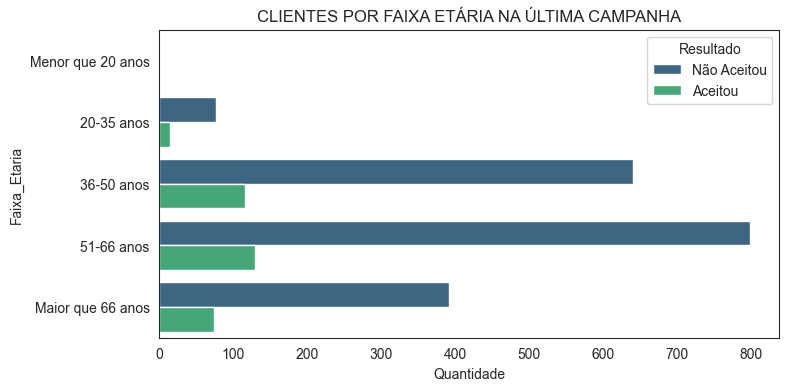

In [115]:
# Representação gráfica dos resultados de aceitação da última campanha de acordo com cada faixa etária.
plt.figure(figsize=(8, 4))
sns.countplot(y='Faixa_Etaria', hue='Response', data=data, palette="viridis")
plt.title('CLIENTES POR FAIXA ETÁRIA NA ÚLTIMA CAMPANHA')
plt.xlabel('Quantidade')
plt.ylabel('Faixa_Etaria')
plt.legend(title='Resultado', labels=['Não Aceitou', 'Aceitou'])
plt.show()



<font color=black size=4>

- **_Concluímos então que o maior volume de aceitação na última campanha foi de clientes entre 36 e 66 anos._**

- **_Porém essas faixas etárias representam 74% da base total de consumidores, logo é necessária a análise de outras variáveis para conclusões e sugestões mais assertivas._**

</font>


<font color=blue size=4>
Variáveis de escolaridade e estado civil dos consumidores ("Education" e "Marital_Status").
</font>

In [116]:
# Calculando a proporção de clientes por escolaridade no dataset.
qtde_escolaridade = calcular_qtde_clientes(data,'Education') 
percentuais_escolaridade = calcular_percentual_clientes(data,'Education') 

df_escolaridade = pd.DataFrame({'Valores': qtde_escolaridade ,'Representação': percentuais_escolaridade})


df_escolaridade

,Valores,Representação
Education,,
Graduation,1127,50.0%
PhD,486,22.0%
Master,370,17.0%
2n Cycle,203,9.0%
Basic,54,2.0%


In [117]:
# Calculando a proporção de clientes por estado civil no dataset.
qtde_estado_civil = calcular_qtde_clientes(data,'Marital_Status')
percentuais_estado_civil = calcular_percentual_clientes(data,'Marital_Status')

df_estado_civil = pd.DataFrame({'Valores': qtde_estado_civil ,'Representação': percentuais_estado_civil})


df_estado_civil


,Valores,Representação
Marital_Status,,
Married,864,39.0%
Together,580,26.0%
Single,480,21.0%
Divorced,232,10.0%
Widow,77,3.0%
Alone,3,0.0%
Absurd,2,0.0%
YOLO,2,0.0%


<font color=black size=4>

- **_Após uma análise das variáveis de escolaridade e estado civil, constatou-se os seguintes resultados:_**
    - **_Mais da metade da base total de clientes possui uma graduação._**
    - **_65% dos clientes são casados ou convivem juntos._**
</font>

<font color=black size=5>

**Segmentação dos clientes**
</font>

<font color=blue size=4>
Analisando as variáveis combinadas.
</font>

In [118]:
# Calculando a proporção de clientes por estado civil e escolaridade no dataset.

grupo_variaveis = data.groupby(['Education', 'Marital_Status']).size()
percentuais = (data.groupby(['Education', 'Marital_Status']).size().div(len(data)) * 100).round(2).astype(str) + '%'

df_estado_civil_escolaridade = pd.DataFrame({'Valores': grupo_variaveis, 'Representação do Total de Clientes(%)': percentuais})


df_estado_civil_escolaridade


Valores Representação do Total de Clientes(%)
Education  Marital_Status                                               
2n Cycle   Divorced             23                                 1.03%
           Married              81                                 3.62%
           Single               37                                 1.65%
           Together             57                                 2.54%
           Widow                 5                                 0.22%
Basic      Divorced              1                                 0.04%
           Married              20                                 0.89%
           Single               18                                  0.8%
           Together             14                                 0.62%
           Widow                 1                                 0.04%
Graduation Absurd                1                                 0.04%
           Alone                 1                                 0.04%
           Divorced            119                                 5.31%
           Married             433                                19.33%
           Single              252                                11.25%
           Together            286                                12.77%
           Widow                35                                 1.56%
Master     Absurd                1                                 0.04%
           Alone                 1                                 0.04%
           Divorced             37                                 1.65%
           Married             138                                 6.16%
           Single               75                                 3.35%
           Together            106                                 4.73%
           Widow                12                                 0.54%
PhD        Alone                 1                                 0.04%
           Divorced             52                                 2.32%
           Married             192                                 8.57%
           Single               98                                 4.38%
           Together            117                                 5.22%
           Widow                24                                 1.07%
           YOLO                  2                                 0.09%

<font color=black size=4>

- **_Agrupando as variáveis de escolaridade e estado civil features temos a informação de que 32% dos consumidores são casados ou convivem juntos e possuem uma graduação._**
</font>


<font color=blue size=4>
Analisando a representação dos clientes que aceitaram a campanha nas variáveis escolaridade e estado civil
</font>

In [119]:
# Calculando o total de clientes para cada grupo de estado civil e escolaridade
qtde_clientes_por_grupo = grupo_variaveis
percentuais_total = (qtde_clientes_por_grupo.div(len(data)) * 100).round(2).astype(str) + '%'

# Calculando o total de clientes na campanha para cada grupo
grupo_campanha = data.groupby(['Education', 'Marital_Status'])['Response']

# Calculando o total e percentual de clientes que aceitaram ou não a campanha para cada grupo

qtde_aceite_campanha = grupo_campanha.sum()
qtde_nao_aceite_campanha = qtde_clientes_por_grupo - qtde_aceite_campanha

percentual_aceite_campanha = ((qtde_aceite_campanha / qtde_clientes_por_grupo) * 100).round(2).astype(str) + '%'
percentual_nao_aceite_campanha = ((qtde_nao_aceite_campanha / qtde_clientes_por_grupo) * 100).round(2).astype(str) + '%'


df_campanha_estado_civil_escolaridade = pd.DataFrame({
    'Total de Clientes': qtde_clientes_por_grupo,
    'Representação do Total de Clientes (%)': percentuais_total,
    'Aceitou Campanha (%)': percentual_aceite_campanha,
    'Não Aceitou Campanha (%)': percentual_nao_aceite_campanha
})

df_campanha_estado_civil_escolaridade




Total de Clientes  \
Education  Marital_Status                      
2n Cycle   Divorced                       23   
           Married                        81   
           Single                         37   
           Together                       57   
           Widow                           5   
Basic      Divorced                        1   
           Married                        20   
           Single                         18   
           Together                       14   
           Widow                           1   
Graduation Absurd                          1   
           Alone                           1   
           Divorced                      119   
           Married                       433   
           Single                        252   
           Together                      286   
           Widow                          35   
Master     Absurd                          1   
           Alone                           1   
           Divorced                       37   
           Married                       138   
           Single                         75   
           Together                      106   
           Widow                          12   
PhD        Alone                           1   
           Divorced                       52   
           Married                       192   
           Single                         98   
           Together                      117   
           Widow                          24   
           YOLO                            2   

                          Representação do Total de Clientes (%)  \
Education  Marital_Status                                          
2n Cycle   Divorced                                        1.03%   
           Married                                         3.62%   
           Single                                          1.65%   
           Together                                        2.54%   
           Widow                                           0.22%   
Basic      Divorced                                        0.04%   
           Married                                         0.89%   
           Single                                           0.8%   
           Together                                        0.62%   
           Widow                                           0.04%   
Graduation Absurd                                          0.04%   
           Alone                                           0.04%   
           Divorced                                        5.31%   
           Married                                        19.33%   
           Single                                         11.25%   
           Together                                       12.77%   
           Widow                                           1.56%   
Master     Absurd                                          0.04%   
           Alone                                           0.04%   
           Divorced                                        1.65%   
           Married                                         6.16%   
           Single                                          3.35%   
           Together                                        4.73%   
           Widow                                           0.54%   
PhD        Alone                                           0.04%   
           Divorced                                        2.32%   
           Married                                         8.57%   
           Single                                          4.38%   
           Together                                        5.22%   
           Widow                                           1.07%   
           YOLO                                            0.09%   

                          Aceitou Campanha (%) Não Aceitou Campanha (%)  
Education  Marital_Status                                                
2n Cycle   Divorced                     21.74%   

**Visualizando as informações de aderência à campanha para cada feature**

In [120]:
# Clientes para cada grupo de estado civil
qtde_estado_civil

# Calculando o total de clientes que aceitaram ou não a campanha para cada grupo de estado civil
qtde_aceite_estado_civil = calcular_qtde_clientes(response_aceitou,'Marital_Status')
qtde_nao_aceite__estado_civil = calcular_qtde_clientes(response_nao_aceitou,'Marital_Status')


df_campanha_estado_civil = pd.DataFrame({
    'Clientes': qtde_estado_civil,
    'Aceitou Campanha': qtde_aceite_estado_civil,
    'Não Aceitou Campanha': qtde_nao_aceite__estado_civil,
})

df_campanha_estado_civil


,Clientes,Aceitou Campanha,Não Aceitou Campanha
Marital_Status,,,
Absurd,2,1,1
Alone,3,1,2
Divorced,232,48,184
Married,864,98,766
Single,480,106,374
Together,580,60,520
Widow,77,19,58
YOLO,2,1,1


In [121]:
# Clientes para cada grupo de escolaridade
qtde_escolaridade

# Calculando o total de clientes que aceitaram ou não a campanha para cada nível de escolaridade
qtde_aceite_escolaridade = calcular_qtde_clientes(response_aceitou,'Education')
qtde_nao_aceite_escolaridade = calcular_qtde_clientes(response_nao_aceitou,'Education')

df_campanha_escolaridade = pd.DataFrame({
    'Total de Clientes': qtde_escolaridade,
    'Aceitou Campanha': qtde_aceite_escolaridade,
    'Não Aceitou Campanha': qtde_nao_aceite_escolaridade,
})


df_campanha_escolaridade

,Total de Clientes,Aceitou Campanha,Não Aceitou Campanha
Education,,,
Graduation,1127,152,975
PhD,486,101,385
Master,370,57,313
2n Cycle,203,22,181
Basic,54,2,52


<font color=black size=4>

- **_Considerando a análise combinada anterior, os clientes que possuem uma gradução e estão casados ou juntos representaram apenas 20% dos consumidores que aderiram à última campanha._** 
- **_Em relação ao estado civil, a maior aceitação à campanha foi de clientes solteiros, que representam somente 21% da base total._**
</font>


<font color=blue size=4>

Análise das variáveis dias da última compra e média de valor gasto com vinhos.("*Recency*" * e "*MntWines*" *)
</font>


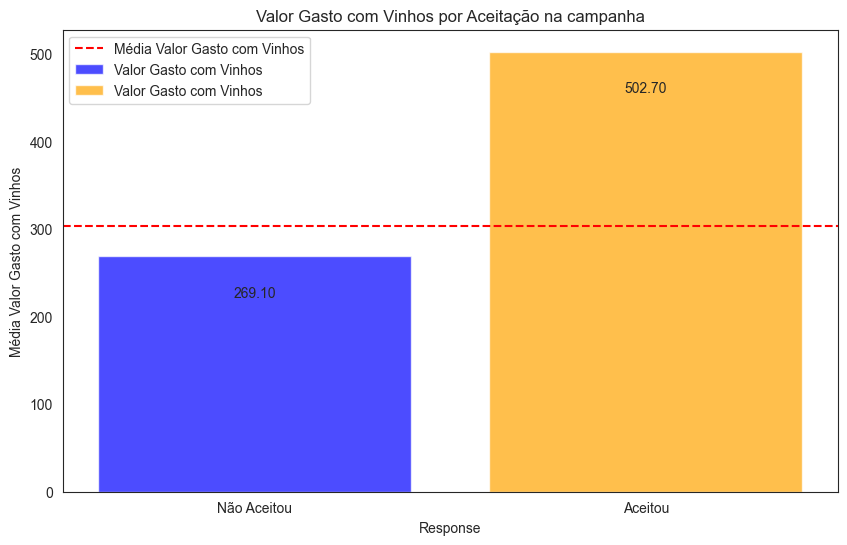

In [122]:
plt.figure(figsize=(10, 6))

# Calculando as médias de valores gastos com vinho por clientes que aceitaram ou não a campanha
avg_mnt_wines = data.groupby('Response')['MntWines'].mean()

# Configurações do gráfico
bar_colors = ['blue', 'orange']
for i in range(len(avg_mnt_wines)):
    plt.bar(i, avg_mnt_wines[i], color=bar_colors[i], alpha=0.7, label='Valor Gasto com Vinhos')
    plt.text(i, avg_mnt_wines[i] - 50, f'{avg_mnt_wines[i]:.2f}', ha='center', va='bottom')

avg_total_mnt_wines = data['MntWines'].mean()
plt.axhline(y=avg_total_mnt_wines, color='red', linestyle='--', label='Média Valor Gasto com Vinhos')
plt.legend(loc='upper left')
plt.title('Valor Gasto com Vinhos por Aceitação na campanha')
plt.xlabel('Response')
plt.ylabel('Média Valor Gasto com Vinhos')
plt.xticks([0, 1], ['Não Aceitou', 'Aceitou'])

plt.show()


<font color=black size=4>

- **_Analisando a variável conclui-se que os consumidores que aderiram à última campanha, no geral, tiveram um gasto maior com vinhos nos últimos dois anos._**
- **_A alta aderência de consumidores nesse perfil pode ter sido originada por ofertas de vinhos mais caros na campanha, resultando na aquisição por clientes que já possuem esse perfil de compra._**
</font>

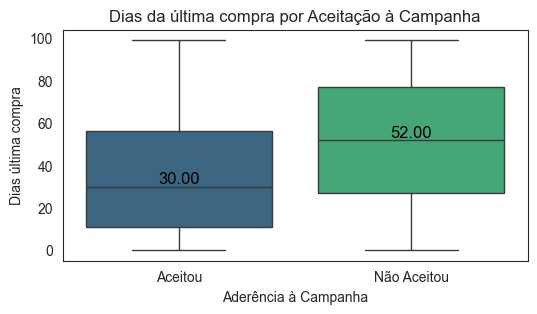

In [123]:
# Legendas para variável Response
data['Response_Label'] = data['Response'].map({1: 'Aceitou', 0: 'Não Aceitou'})

# Configurando gráfico
sns.set_style("white")
plt.figure(figsize=(6, 3))
sns.boxplot(data=data, x='Response_Label', y='Recency', palette="viridis", hue='Response_Label', legend=False)

for i, box in enumerate(data.groupby('Response_Label')['Recency'].median()):
    plt.text(i, box, f'{box:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.grid(False)
plt.title('Dias da última compra por Aceitação à Campanha')
plt.xlabel('Aderência à Campanha')
plt.ylabel('Dias última compra')

plt.show()



<font color=black size=4>

- **_Em relação à quantidade de dias da última compra, clientes que efeturam o último pedido na média de 30 dias tiveram maior aceitação à campanha comparado com consumidores que estavam a mais de 50 dias sem realizar uma compra._**
</font>

> <font color=darkblue size=6>
> 
> Para próximas campanhas, utilizando esse mesmo dataset, o público alvo deve ser dos clientes com perfis que possuem maior representatividade em relação ao todo, tendo como sugestões ofertas de combos duplos dos produtos para casais, produtos que agradem clientes na faixa etária entre 36 e 66 anos, clientes que tenham efetuado compras na loja, site ou outras plataformas a menos de 30 dias e entre outros.
> 
> </font>